# Modelo de previsão de entradas no ginásio durante um dia

Este notebook apresenta o processo de desenvolvimento de dois modelo de Machine Learning para prever a contagem de pessoas que entram no ginásio em um determinado momento, especificamente na sexta-feira.

## 1. Imports

In [369]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score 
import matplotlib.pyplot as plt

## 2. Carregar os dados

In [370]:
data = pd.read_csv('datagymbox_treated.csv')

## 3. Tratamento de dados

In [371]:
# Agrupar os dados pela hora para obter o número de entradas nessa hora
data['count'] = 1
data_grouped = data.groupby(['year', 'month', 'day', 'weekday', 'hour'], as_index=False)['count'].sum()

print(data_grouped)

    year  month  day    weekday  hour  count
0   2023      5    3  Wednesday     8    931
1   2023      5    3  Wednesday     9   2254
2   2023      5    3  Wednesday    10   2442
3   2023      5    3  Wednesday    11   2605
4   2023      5    3  Wednesday    12   2276
..   ...    ...  ...        ...   ...    ...
77  2023      5    9    Tuesday    17   2046
78  2023      5    9    Tuesday    18   1879
79  2023      5    9    Tuesday    19   1943
80  2023      5    9    Tuesday    20   1542
81  2023      5    9    Tuesday    21   1435

[82 rows x 6 columns]


In [372]:
# Converter o dia da semana para um valor numérico
data_grouped['weekday'] = data_grouped['weekday'].map({'Monday':1, 'Tuesday':2, 'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7})

print(data_grouped)

    year  month  day  weekday  hour  count
0   2023      5    3        3     8    931
1   2023      5    3        3     9   2254
2   2023      5    3        3    10   2442
3   2023      5    3        3    11   2605
4   2023      5    3        3    12   2276
..   ...    ...  ...      ...   ...    ...
77  2023      5    9        2    17   2046
78  2023      5    9        2    18   1879
79  2023      5    9        2    19   1943
80  2023      5    9        2    20   1542
81  2023      5    9        2    21   1435

[82 rows x 6 columns]


## 4. Modelação

### 4.1. Divisão do dataset

In [373]:
# Seleção de recursos
features = ['year', 'month', 'day', 'weekday', 'hour']
X = data_grouped[features]
y = data_grouped['count']

In [374]:
# Separar os dados de treino e teste com base no dia da semana
X_train = data_grouped[data_grouped['weekday'] < 5][features]   # Dias da semana de segunda (1) a quinta-feira (4)
y_train = data_grouped[data_grouped['weekday'] < 5]['count']

X_test = data_grouped[data_grouped['weekday'] == 5][features]  # Sexta-feira (5)
y_test = data_grouped[data_grouped['weekday'] == 5]['count']

### 4.2. Modelo RandomForestRegressor

In [375]:
# Criação do modelo
model_rfr = RandomForestRegressor(n_estimators=100, random_state=1785)

# Treio do modelo
model_rfr.fit(X_train, y_train)

RandomForestRegressor(random_state=1785)

In [376]:
# Previsão
y_pred_rfr = model_rfr.predict(X_test)

# Avaliação do modelo RandomForestRegressor
mse = mean_squared_error(y_test, y_pred_rfr)
r2 = r2_score(y_test, y_pred_rfr)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 95326.89288666665
R-squared: 0.6302225431515485


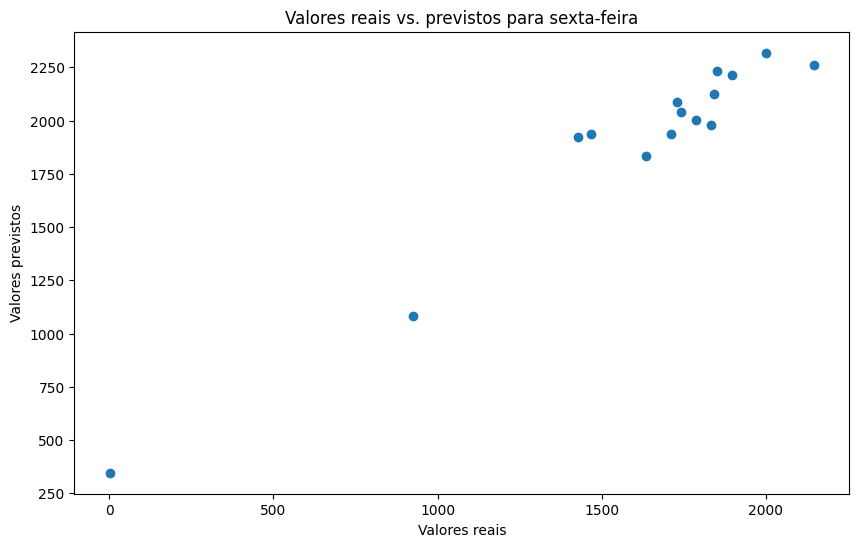

In [377]:
# Gráfico de dispersão dos valores previstos vs. reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rfr)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.title('Valores reais vs. previstos para sexta-feira')
plt.show()

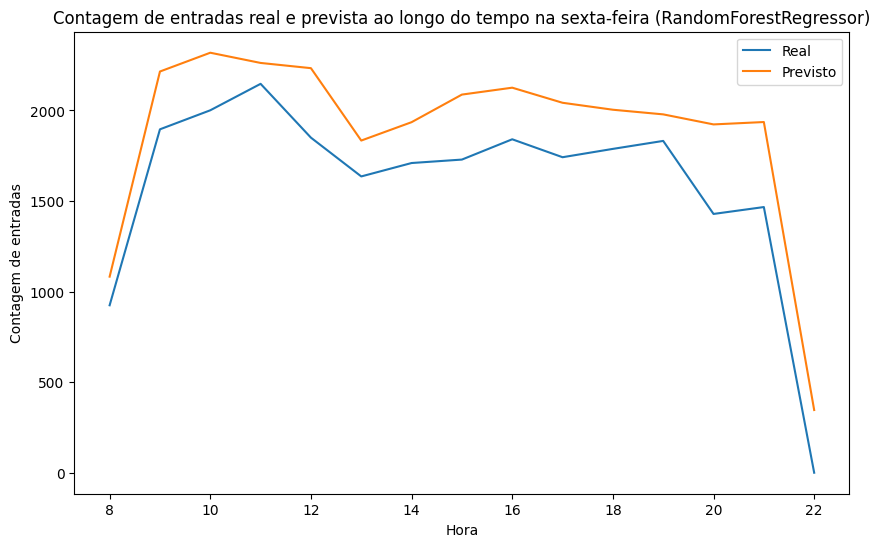

In [378]:
# Gráfico de linha dos valores previstos e reais ao longo do tempo
# Aqui supomos que você tem uma coluna 'hour' em seu conjunto de dados de teste que representa a hora de cada observação.
X_test['real_values'] = y_test
X_test['predicted_values'] = y_pred_rfr

X_test_sorted = X_test.sort_values(by='hour')  

plt.figure(figsize=(10, 6))
plt.plot(X_test_sorted['hour'], X_test_sorted['real_values'], label='Real')
plt.plot(X_test_sorted['hour'], X_test_sorted['predicted_values'], label='Previsto')
plt.xlabel('Hora')
plt.ylabel('Contagem de entradas')
plt.title('Contagem de entradas real e prevista ao longo do tempo na sexta-feira (RandomForestRegressor)')
plt.legend()
plt.show()

### 4.3. Modelo GradientBoostRegressor

In [379]:
# Criação do modelo
model_gb = GradientBoostingRegressor()

# Treinamento do modelo
model_gb.fit(X_train, y_train)

GradientBoostingRegressor()

In [380]:
X_test_for_pred = X_test.drop(['real_values', 'predicted_values'], axis=1)

# Previsão
X_test_for_pred = X_test.drop(['real_values', 'predicted_values'], axis=1)
y_pred_gb = model_gb.predict(X_test_for_pred)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred_gb)
r2 = r2_score(y_test, y_pred_gb)

print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 89297.37028230916
R-squared: 0.6536113421266739


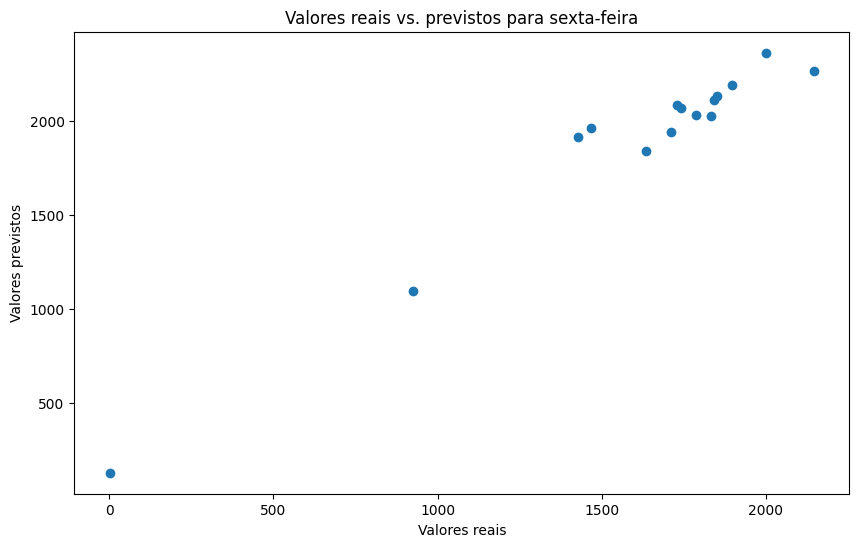

In [381]:
# Gráfico de dispersão dos valores previstos vs. reais
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_gb)
plt.xlabel('Valores reais')
plt.ylabel('Valores previstos')
plt.title('Valores reais vs. previstos para sexta-feira')
plt.show()

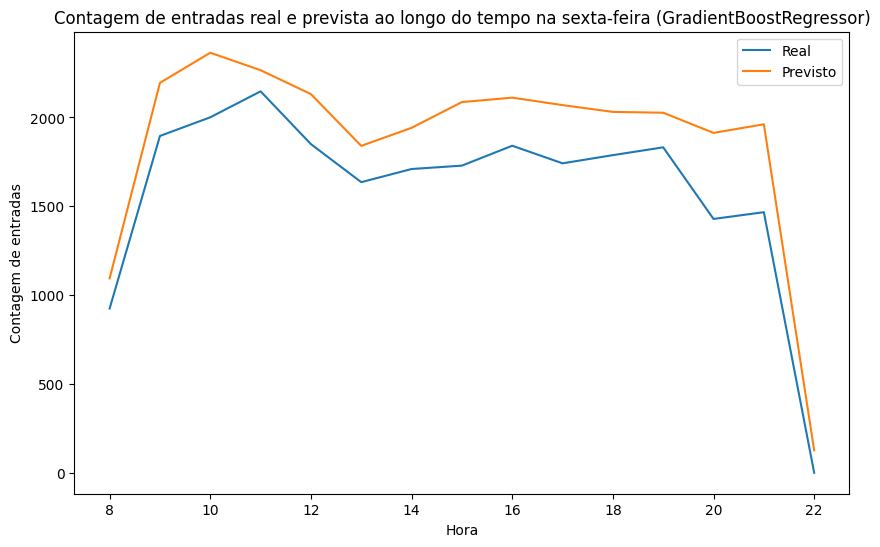

In [382]:
# Gráfico de linha dos valores previstos e reais ao longo do tempo
X_test['real_values'] = y_test
X_test['predicted_values'] = y_pred_gb

X_test_sorted = X_test.sort_values(by='hour')  

plt.figure(figsize=(10, 6))
plt.plot(X_test_sorted['hour'], X_test_sorted['real_values'], label='Real')
plt.plot(X_test_sorted['hour'], X_test_sorted['predicted_values'], label='Previsto')
plt.xlabel('Hora')
plt.ylabel('Contagem de entradas')
plt.title('Contagem de entradas real e prevista ao longo do tempo na sexta-feira (GradientBoostRegressor)')
plt.legend()
plt.show()